# Содержание

1.  Изучение данных из файла
2.  Предобработка данных
3.  Расчёты и добавление результатов в таблицу
4.  Исследовательский анализ данных
5.  Общий вывод

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель**: установить параметры для определения рыночной стоимости и построения автоматизированной системы, которая отследит аномалии и мошенническую деятельность. 

## Изучение данных из файла

In [214]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')

except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проверим на пропуски и типы данных:

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [216]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Таблица содержит 23699 линеек. После вывода первых 5 строк и вызова методов info и describe, можно отметить следующие наблюдения:
- пропущенные значения в `столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition`;
- формат даты в столбце `first_day_exposition` можно привести к виду %Y-%m-%d, значения времени избыточны для наших целей;
- данные в столбцах `floors_total,  days_exposition` необходимо привести в целочисленный формат; данные в столбцах `balcony, parks_around3000, ponds_around3000` так же;
- информацию в столбцах `airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest`  необходимо перевести в километры, что будет более практично для бытового описания;
- подозрительные данные в столбце `last_price`: допустим, минимальная стоимость квартиры составляет 12190 рублей, исходя из положения, что цены указаны в рублях - отражает ли это стоимость в рублях / валюте, или может быть, в данном случае указали сумму аренды;
- подозрительные данные в столбце `ceiling_height`: минимальная высота потолка составляет 1 м, а максимальная - 100 м;
- подозрительные данные в столбце `rooms`: минимальное количество комнат 0; в столбце `parks_nearest` минимальное расстояние составляет 1 м (возможно, имелся в виду 1 км);
- однозначно наличие текстовых дубликатов в столбце `locality_name`.

## Предобработка данных

Проведем обработку данных. Сначала исправим данные в столбце `ceiling_height`, т.к. он идет первым в списке с отсутствующими значениями и не подлежит массовой обработке с остальными рядами.

Были обнаружены следующие аномалии:
- Имеются экстремальные значения в 1.20, 1.00. Логичного объяснения таким ошибкам нет, и остальные характеристики квартир являются нормальными. `Заменим эти значения на средние`;
- За минимальную высоту потолков примем 2,2 м (по СанПину), однако, оставим промежуточные значения от 1,75 до 2,2 м: такая высота потолков хоть и некомфортна, но будем считать ее условно нормальной (могут быть некачественно установленые подвесные потолки / поднят уровень пола и т.п.). Эти данные могут пригодиться в дальнейшем при проверке стоимости квартиры: вдруг она окажется ниже именно из-за этого?
- О максимальной высоте потолков судить трудно: квартиры в элитных новостройках могут иметь потолки высотой до 9-10 м.
- Двузначные значения, вероятнее всего, судя по стоимости и остальным параметрам, ошибочно заданы в дециметрах. Переведем их в метры, разделив на 10.

**Замена значений высоты потолков (ceiling_height)** 

Выделим датафрейм без экстремальных значений и выясним среднюю высоту потолков:

In [217]:
df_ceiling = df.query('ceiling_height >= 1.75 & ceiling_height < 10.0')
ceiling_mean = round(df_ceiling['ceiling_height'].mean(),2)
print("Среднее значение высоты потолков:",ceiling_mean)

Среднее значение высоты потолков: 2.73


Проверим ценовую категорию квартир с высотой потолков более 20 "условных метров". Как видим, характеристики и стоимость квартир не выдающиеся, что может подтвердить нашу гипотезу о том, что высоту необходимо перевести из дециметров в метры, разделив значения на 10:

In [218]:
df_20 = df.query('ceiling_height >= 20')
df_20.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Произведем данную операцию:

In [219]:
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df['ceiling_height'] / 10

Пропущенные значения высоты потолков пока заменять не будем, т.к. во-первых, для расчетов можно обойтись без этих значений, во-вторых, впоследствии можем прийти к неверным выводам на основании замененных данных.

Проверим количество значений ниже 1,75 м:

In [220]:
print(df.query('ceiling_height < 2')['ceiling_height'].count())

3


Таких значений всего три. Оставим их неизменными, их слишком мало. В дальнейшем можем исключить их во время фильтровки.

Проверим набор уникальных значений:

In [221]:
print(df['ceiling_height'].unique())

[ 2.7    nan  3.03  2.5   2.67  2.56  3.05  2.75  2.6   2.9   2.8   2.55
  3.    2.65  3.2   2.61  3.25  3.45  2.77  2.85  2.64  2.57  4.15  3.5
  3.3   2.71  4.    2.47  2.73  2.84  3.1   2.34  3.4   3.06  2.72  2.54
  2.51  2.78  2.76  2.58  3.7   2.52  5.2   2.87  2.66  2.59  2.    2.45
  3.6   2.92  3.11  3.13  3.8   3.15  3.55  3.16  3.62  3.12  2.53  2.74
  2.96  2.46  5.3   5.    2.79  2.95  4.06  2.94  3.82  3.54  3.53  2.83
  4.7   2.4   3.38  3.01  5.6   3.65  3.9   3.18  3.35  2.3   3.57  2.48
  2.62  2.82  3.98  2.63  3.83  3.52  3.95  3.75  2.88  3.67  3.87  3.66
  3.85  3.86  4.19  3.24  4.8   4.5   4.2   3.36  3.08  3.68  3.07  3.37
  3.09  8.    3.26  3.34  2.81  3.44  2.97  3.14  4.37  2.68  3.22  3.27
  4.1   2.93  3.46  3.47  3.33  3.63  3.32  1.2   8.3   2.98  2.86  3.17
  4.4   3.28  3.04  4.45  5.5   3.84  3.23  3.02  3.21  3.43  3.78  4.3
  3.39  2.69  3.31  4.65  3.56  2.2   3.51  3.93  3.42  2.99  3.49 14.
  4.14  2.91  3.88  1.75  4.25  3.29  2.25  3.76  3.69 

Выведем на печать минимальные и максимальные значения:

In [222]:
print(df['ceiling_height'].min())
print(df['ceiling_height'].max())

1.0
14.0


Все еще присутствует пороговое значение в 14 м. Проверим характеристики квартиры: они не выдающиеся, к тому же заметно дублирование с общим количеством этажей в доме, вероятно, кто-то неаккуратно сделал copy-paste, поэтому заменим высоту на среднюю и выведем на печать макс / мин значения:

In [223]:
df_14 = df.query('ceiling_height >= 14')
df_14.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0


In [224]:
df.loc[df['ceiling_height'] == 14, 'ceiling_height'] = ceiling_mean

print(df['ceiling_height'].min())
print(df['ceiling_height'].max())

1.0
10.3


**Замена значений столбца first_day_exposition на формат даты**

In [225]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Замена значений столбцов floors_total, balcony, parks_around3000, ponds_around3000 на целочисленный формат**

Сначала изменим заменим пропущенные значения на нулевые:

In [226]:
df.fillna({'floors_total':0,'balcony':0,'parks_around3000':0,'ponds_around3000':0},inplace=True)

Далее изменим заменим тип данных на целочисленный:

In [227]:
cols = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
for col in cols:
    df[col] = df[col].astype(int)

Проверяем выполнение замен при помощи метода info(). Замена была выполнена.

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int32
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int32
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int32
parks_nearest           8079 non-null float64
ponds_around3

**Объединим различные категории квартир в один столбец**

Создадим новый  столбец 'сategory'. Для предварительной оценки создадим временнюу таблицу из трех категорий: 'is_apartment', 'studio', 'open_plan' и распечатаем количества, соответствующие параметру True. Эти значения перенесем в главную таблицу, в новый  столбец 'сategory'.

Заменим отсутствующие значения в столбце is_apartment на 0:

In [229]:
df['is_apartment'] = df['is_apartment'].fillna(0)

Перед манипуляциями проверим количества нестандартных категорий квартир. Их немного по сравнению с необозначенной категорией квартир, назовем ее в дальнейшем 'regular':

In [230]:
df_cat = df[['is_apartment', 'studio', 'open_plan']]

is_apartment_grp = df_cat.groupby('is_apartment')['is_apartment'].count()
studio_grp = df_cat.groupby('studio')['studio'].count()
open_plan_grp = df_cat.groupby('open_plan')['open_plan'].count()
print(is_apartment_grp)
print(studio_grp)
print(open_plan_grp)

is_apartment
0       23649
True       50
Name: is_apartment, dtype: int64
studio
False    23550
True       149
Name: studio, dtype: int64
open_plan
False    23632
True        67
Name: open_plan, dtype: int64


Добавляем новый столбец 'сategory':

In [231]:
def categorize():
    df.loc[df['is_apartment']== True, 'category'] = 'apartment'
    df.loc[df['studio']== True, 'category'] = 'studio'
    df.loc[df['open_plan']== True, 'category'] = 'open_plan'
    df['category'] = df['category'].fillna(0)
    df['category'] = df['category'].replace(0,'regular')
categorize()

Проверим соотношение категорий в столбце 'category'. Замена полностью произведена.

In [232]:
print(df['category'].value_counts())

regular      23433
studio         149
open_plan       67
apartment       50
Name: category, dtype: int64


**Замена пропущенных значений в столбце living_area** 

Заменим пропущенные значения в столбце living_area средними значениями для известного количества комнат. Для этого разделим таблицу с исключенными пропущенными значениями на категории в зависимости от количества комнат. Сделаем проверочные выборки во временные таблицы.

Проверим количества комнат в выборке с неизвестной площадью (это временная таблица, только для сравнения, она в дальнейшем не понадобится):

In [233]:
df_liv_na =  df[df['living_area'].isna() & df['rooms'] > 0]
print(df_liv_na['rooms'].value_counts())

1    659
3    448
5     34
7      6
9      1
Name: rooms, dtype: int64


Для визуального ознакомления создадим временную таблицу со средними значениями жилой площади квартир с разным количеством комнат:

In [234]:
df_liv_notna = df.query('living_area>= 0 & 0 < rooms < 10').groupby('rooms')['living_area'].mean().round(decimals=2)
df_liv_notna.head(10)

rooms
1     17.89
2     31.74
3     47.39
4     66.98
5    100.01
6    130.98
7    163.56
8    168.68
9    190.26
Name: living_area, dtype: float64

Произведем замену данных в главной таблице:

In [235]:
df_liv_last = df.query('living_area>= 0 & 0 < rooms < 10')
for room_number in df['rooms'][(df['rooms']>0) & (df['rooms']<10) & (df['living_area'].isna())].unique():
    area = round(df_liv_last.loc[df_liv_last['rooms'] == room_number, 'living_area'].mean(),2)
    df.loc[(df['rooms'] == room_number) & (df['living_area'].isna()),'living_area'] = area

Проверим состав таблицы:

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int32
living_area             23685 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int32
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int32
parks_nearest           8079 non-null float64
ponds_around

Замена произведена, за исключением 14 линеек (ячеек со значениями 23685 из общего количества 23699), проверим их:

In [237]:
df_liv_na =  df[df['living_area'].isna()]
df_liv_na.head(14)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category
608,2,1850000.0,25.0,2019-02-20,0,NaN,10,NaN,7,0,...,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,29.0,studio
780,9,2600000.0,26.1,2018-02-20,0,NaN,18,NaN,8,0,...,1,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,45.0,open_plan
2409,4,1980000.0,27.0,2018-03-23,0,NaN,18,NaN,4,0,...,0,посёлок Петро-Славянка,20605.0,27165.0,0,NaN,2,663.0,75.0,studio
3147,7,2170000.0,31.0,2017-12-30,0,2.60,12,NaN,12,0,...,0,Тосно,NaN,NaN,0,NaN,0,NaN,198.0,studio
3874,13,1700000.0,21.4,2015-02-11,0,2.70,3,NaN,2,0,...,0,Всеволожск,NaN,NaN,0,NaN,0,NaN,NaN,studio
4901,5,2200000.0,24.0,2018-10-22,0,NaN,0,NaN,6,0,...,0,посёлок Бугры,NaN,NaN,0,NaN,0,NaN,51.0,studio
5187,5,3300000.0,25.4,2018-11-02,0,NaN,0,NaN,15,0,...,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,3.0,studio
5749,20,3590000.0,25.0,2017-08-30,0,2.80,35,NaN,26,0,...,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,198.0,open_plan
5958,1,3200000.0,30.3,2018-09-07,0,NaN,0,NaN,13,0,...,0,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,68.0,studio
7818,11,3300000.0,27.3,2018-04-06,0,NaN,20,NaN,9,0,...,2,Санкт-Петербург,15990.0,13853.0,0,NaN,1,584.0,31.0,open_plan


Проверим еще раз разбивку по площади квартир в зависимости от количества комнат:

In [238]:
df.query('total_area>= 0').groupby('rooms')['total_area'].mean().round(decimals=2).head(20)

rooms
0      29.28
1      37.64
2      55.86
3      77.76
4     107.61
5     161.47
6     201.54
7     265.33
8     259.23
9     305.98
10    259.57
11    188.90
12    900.00
14    304.20
15    590.00
16    270.00
19    374.60
Name: total_area, dtype: float64

Как видим, **общая площадь (total_area)** по позициям с пропущенными значениями примерно соответствует однокомнатным квартирам, заменим их на эту категорию. Кроме того, количество комнат для экстремального значения площади 371 кв.м заменим на "19 комнат".

In [239]:
df['living_area'] = df['living_area'].fillna(0)
df.loc[df['living_area'] == 0, 'living_area'] = 31.74
df.loc[df['rooms'] == 0, 'rooms'] = 1
df.loc[df['total_area'] == 371, 'rooms'] = 19

Проверим состав таблицы, замена произведена:

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int32
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int32
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int32
parks_nearest           8079 non-null float64
ponds_around

**Замена пропущенных значений в столбце kitchen_area**

Заменим отсутствующие значения kitchen_area. Так как неясно, на основании чего вывести значения для замены, проверим средние значения в парах: 
- "общая площадь / площадь кухни", 
- "количество комнат / площадь кухни"
и используем наиболее реалистичные значения для подстановки.

*`ПРИМЕЧАНИЕ`: можно было и проще, через среднее отношение площади кухни к общей площади, и через полученный коэффициент восстановить пропуски (умножая его на общую площадь), но я хотел попрактиковать функции для сортировки*

In [241]:
df_cut = df

Проверим максимальные значения в категориях, для которых будем выполнять разбиение на группы и создавать словари:

In [242]:
df_temp = df_cut[df_cut['kitchen_area'].isna()]
print("Макс значение по общей площади:",df_temp['total_area'].max())
print("Макс значение по количеству комнат:",df_temp['rooms'].max())

Макс значение по общей площади: 500.0
Макс значение по количеству комнат: 19


- По общей площади разобьем квартиры на следующие группы: 37.64 / 77.76 / 161.47 / 305.98 / 500;
- По количеству комнат разобьем квартиры на следующие группы: 1 / 2 / 4 / 10 / 19.

Создаем ответвление таблицы, функцию сортировки по общей площади, применяем ее к таблице и получаем средние значения:

In [243]:
df_temp = df_cut[df_cut['kitchen_area'].notna()]

In [244]:
def sort_total(area):
    if area < 37.64:
        return 37.64
    if area < 77.76:
        return 77.76
    if area < 161.47:
        return 161.47
    if area < 305.98:
        return 305.98
    if area <= 500:
        return 500

df_temp_total = df_temp.query('total_area <=500')
total_dict = df_temp_total[['total_area','kitchen_area']]
total_dict['total_grade'] = total_dict['total_area'].apply(sort_total)
total_grouped = total_dict.groupby(['total_grade']).agg({'kitchen_area':'mean'})
total_grouped.head()

,kitchen_area
total_grade,
37.64,7.865850
77.76,9.566734
161.47,15.749717
305.98,24.864556
500.00,35.177000


Создаем функцию сортировки по количеству комнат, применяем ее к таблице и получаем средние значения:

In [245]:
def sort_rooms(rooms):
    if rooms < 2:
        return 1
    if rooms < 3:
        return 3
    if rooms < 5:
        return 4
    if rooms < 11:
        return 10
    if rooms < 20:
        return 19
    
df_temp_room = df_temp.query('rooms < 20')
room_dict = df_temp_room[['rooms','kitchen_area']]
room_dict['room_grade'] = room_dict['rooms'].apply(sort_rooms)
room_grouped = room_dict.groupby(['room_grade']).agg({'kitchen_area':'mean'})
room_grouped.head()

,kitchen_area
room_grade,
1,9.550118
3,9.979584
4,11.702675
10,19.620993
19,40.037500


Результаты из первой таблицы выглядят предпочтительнее, так как наблюдается более точная градация. Произведем замену в главной таблице.

In [246]:
df['total_grade'] = df['total_area'].apply(sort_total)
value_dict = total_grouped.to_dict()
temp_dict={}
for key, value in value_dict.items():
    for i,j in value.items():
        temp_dict[i]=j
        
for key, value in temp_dict.items():
    df.loc[df['total_grade'] == key, 'kitchen_area'] = value
    
df['kitchen_area'] = df['kitchen_area'].round(decimals=2)

Удалим за ненадобностью столбцы total_grade, is_apartment, studio, open_plan

In [247]:
df.drop(columns =['total_grade', 'is_apartment', 'studio', 'open_plan'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 20 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int32
living_area             23699 non-null float64
floor                   23699 non-null int64
kitchen_area            23699 non-null float64
balcony                 23699 non-null int32
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int32
parks_nearest           8079 non-null float64
ponds_around3000        23699 non-null int32
ponds_nearest           9110 non-null float64
days_exposition         20518 non-null float64
category

**Чистка значений locality_name**

Строки с неизвестными значениями удалим, их немного, на результатах исследования это сказаться не должно.

In [248]:
df = df.dropna(axis=0, subset=('locality_name',))

Далее необходимо привести в порядок названия населенных пунктов. Просмотрим уникальные значения:

In [249]:
print(df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Заменим буквы "ё" на "е":

In [250]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')

Далее нужно привести к единому образцу все упоминания "поселков":

In [251]:
pos_list = []
for combination in df['locality_name'].dropna().unique():
    if 'посел' in combination:
        for char in combination:
            upper_index = [idx for idx in range(len(combination)) if combination[idx].isupper()][0]
        pos_list.append(combination[:upper_index-1])

non_dupl_list = list(set(pos_list))
for comb in non_dupl_list:
    if ' ' not in comb:
        non_dupl_list.remove(comb)
        
print(non_dupl_list)

['поселок городского типа', 'поселок станции', 'коттеджный поселок', 'поселок при железнодорожной станции', 'городской поселок', 'поселок городского типа имени']


Все эти комбинации заменим на одно слово "поселок" в нашей таблице:

In [252]:
for combination in non_dupl_list:
    df['locality_name'] = df['locality_name'].str.replace(combination,'поселок')

Сделаем то же самое для садово-садоводческих товариществ - заменим на "снт":

In [253]:
pos_list = []
for combination in df['locality_name'].dropna().unique():
    if 'садов' in combination:
        for char in combination:
            upper_index = [idx for idx in range(len(combination)) if combination[idx].isupper()][0]
        pos_list.append(combination[:upper_index-1])

non_dupl_list = list(set(pos_list))
for comb in non_dupl_list:
    if ' ' not in comb:
        non_dupl_list.remove(comb)
        
for combination in non_dupl_list:
    df['locality_name'] = df['locality_name'].str.replace(combination,'снт')

Наконец, вынесем указание типа населенного пункта в отдельный столбик:

In [254]:
def assign_type(row):
    for word in row.split(' '):
        while word.islower():
            row.replace(word,'')
            return word
        return 'город'

df['type_settlement'] = df['locality_name'].apply(assign_type)

И уберем категорию населенного пункта в оригинальном столбце:

In [255]:
def remove_type(row):
    for i in row.split():
        if i[0].isupper():
            return row
        else:
            return row.replace(i,'')

df['locality_name'] = df['locality_name'].apply(remove_type)
df['locality_name'] = df['locality_name'].str.strip()

Выполним предпросмотр таблицы:

In [256]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,type_settlement
23694,9,9700000.0,133.81,2017-03-21,3,3.7,5,73.30,3,15.75,...,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,regular,город
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.00,4,9.57,...,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,regular,город
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.70,1,9.57,...,Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,regular,село
23697,13,11475000.0,76.75,2017-03-28,2,3.0,17,31.74,12,9.57,...,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,regular,город
23698,4,1350000.0,32.30,2017-07-21,1,2.5,5,12.30,1,7.87,...,Новый Учхоз,NaN,NaN,0,NaN,0,NaN,NaN,regular,поселок


**Изменение типов данных, стандартизация числовых значений и замена пропущенных значений**

Данные в столбцах airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest переведем в километры, игнорируя нулевые значения, разделив значения на 1000. Перед этим проверим минимальные и максимальные значения, чтобы убедить в диапазоне значений. 

In [257]:
print(df['airports_nearest'].min())
print(df['airports_nearest'].max())
print(df['cityCenters_nearest'].min())
print(df['cityCenters_nearest'].max())
print(df['parks_nearest'].min())
print(df['parks_nearest'].max())
print(df['ponds_nearest'].min())
print(df['ponds_nearest'].max())

0.0
84869.0
181.0
65968.0
1.0
3190.0
13.0
1344.0


Как указано в условиях задания, значения данных перменных выражено в метрах, однако, из общего свода данных выбиваются однозначные и двухначные значения. Вряд ли кто-то будет указывать расстояние до парка "1 м" или "13 м". Поэтому, для расстояний пересчитаем только значения больше двух разрядов. Вероятность ошибки есть, но пока придется  допустить такой вариант.

Создадим и применим функцию divide, которая переведет значения в километры:

In [258]:
def divide(value):
    if value >=100 and value>0:
        value/= 1000
        return value
    
df['airports_nearest'] = df['airports_nearest'].apply(divide).round(decimals=2)
df['cityCenters_nearest'] = df['cityCenters_nearest'].apply(divide).round(decimals=2)
df['parks_nearest'] = df['parks_nearest'].apply(divide).round(decimals=2)
df['ponds_nearest'] = df['ponds_nearest'].apply(divide).round(decimals=2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,type_settlement
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,15.75,...,Санкт-Петербург,18.86,16.03,1,0.48,2,0.76,NaN,regular,город
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.60,1,9.57,...,Шушары,12.82,18.60,0,NaN,0,NaN,81.0,regular,поселок
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.30,4,9.57,...,Санкт-Петербург,21.74,13.93,1,NaN,2,0.57,558.0,regular,город
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,47.39,9,15.75,...,Санкт-Петербург,28.10,6.80,2,NaN,3,0.23,424.0,regular,город
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,15.75,...,Санкт-Петербург,31.86,8.10,2,0.11,1,NaN,121.0,regular,город


Формат данных столбца days_exposition переведем в числовой. Информация о количестве целых дней важнее.

In [259]:
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

In [260]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,type_settlement
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,15.75,...,Санкт-Петербург,18.86,16.03,1,0.48,2,0.76,0,regular,город
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.60,1,9.57,...,Шушары,12.82,18.60,0,NaN,0,NaN,81,regular,поселок
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.30,4,9.57,...,Санкт-Петербург,21.74,13.93,1,NaN,2,0.57,558,regular,город
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,47.39,9,15.75,...,Санкт-Петербург,28.10,6.80,2,NaN,3,0.23,424,regular,город
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,15.75,...,Санкт-Петербург,31.86,8.10,2,0.11,1,NaN,121,regular,город


## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбец со стоимостью одного квадратного метра жилья. Получим простым способом: разделим стоимость на общую жилую площадь.

In [261]:
df['price_per_sqm'] = (df['last_price'] / df['total_area']).round(decimals=2)

Добавим в таблицу столбцы с данными: день недели, месяц и год публикации объявления

In [262]:
df['weekday_exp'] = df['first_day_exposition'].dt.dayofweek
df['month_exp'] = df['first_day_exposition'].dt.month
df['year_exp'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,type_settlement,price_per_sqm,weekday_exp,month_exp,year_exp
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,15.75,...,0.48,2,0.76,0,regular,город,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.60,1,9.57,...,NaN,0,NaN,81,regular,поселок,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.30,4,9.57,...,NaN,2,0.57,558,regular,город,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,47.39,9,15.75,...,NaN,3,0.23,424,regular,город,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,15.75,...,0.11,1,NaN,121,regular,город,100000.00,1,6,2018


Добавим в таблицу столбец с указанием на этаж: первый, последний, другой. Для этого напишем и применим соответствующую функцию

In [263]:
def assign_floor(df):
    if df[8] == 1:
        return 'первый'
    if df[8] == df[6]:
        return 'последний'
    else:
        return 'другой'

df['type_floor'] = df.apply(assign_floor, axis=1)

Добавим в таблицу столбцы с указанием соотношения жилой и общей площади, а также отношения площади кухни к общей:

In [264]:
df['living_to_total'] = (df['living_area'] / df['total_area']).round(decimals=2)
df['kitchen_to_total'] = (df['kitchen_area'] / df['total_area']).round(decimals=2)

In [265]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,days_exposition,category,type_settlement,price_per_sqm,weekday_exp,month_exp,year_exp,type_floor,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,15.75,...,0,regular,город,120370.37,3,3,2019,другой,0.47,0.15
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.60,1,9.57,...,81,regular,поселок,82920.79,1,12,2018,первый,0.46,0.24
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.30,4,9.57,...,558,regular,город,92785.71,3,8,2015,другой,0.61,0.17
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,47.39,9,15.75,...,424,regular,город,408176.10,4,7,2015,другой,0.30,0.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,15.75,...,121,regular,город,100000.00,1,6,2018,другой,0.32,0.16


**На этом все задания по предобработке выполнены**

## Исследовательский анализ данных

**Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра**

Для удобного отображения цен на квартиры выразим цены в млн рублей, разделив last_price на 1000000. Создадим столбец price. 

In [266]:
df_fork = df
df_fork['price'] = df_fork['last_price'] / 1000000
df_fork = df_fork.drop('last_price', 1)

Вызовем функцию describe для изучения параметров, а также коробчатые диаграммы

In [267]:
df_fork.describe()

,total_images,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exp,month_exp,year_exp,living_to_total,kitchen_to_total,price
count,23650.000000,23650.000000,23650.000000,14490.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18115.00000,...,23650.000000,8574.000000,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000
mean,9.862326,60.329069,2.079197,2.728578,10.637505,34.439858,5.893277,10.538069,0.591712,28.80483,...,0.590359,0.545044,156.448964,9.943225e+04,2.568710,6.401564,2017.370021,0.565858,0.192197,6.541127
std,5.682278,35.661808,1.072032,0.305671,6.613891,21.806967,4.883317,3.480810,0.959662,12.63585,...,0.883539,0.262162,213.564548,5.033794e+04,1.788808,3.491418,1.037806,0.113296,0.045086,10.896399
min,0.000000,12.000000,1.000000,1.000000,0.000000,2.000000,1.000000,7.870000,0.000000,6.45000,...,0.000000,0.100000,0.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.020000,0.030000,0.012190
25%,6.000000,40.000000,1.000000,2.510000,5.000000,18.400000,2.000000,9.570000,0.000000,18.58000,...,0.000000,0.340000,22.000000,7.661496e+04,1.000000,3.000000,2017.000000,0.490000,0.160000,3.400000
50%,9.000000,52.000000,2.000000,2.650000,9.000000,30.330000,4.000000,9.570000,0.000000,26.76000,...,0.000000,0.530000,73.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.570000,0.190000,4.650000
75%,14.000000,69.700000,3.000000,2.800000,16.000000,42.700000,8.000000,9.570000,1.000000,37.29000,...,1.000000,0.750000,198.000000,1.142742e+05,4.000000,10.000000,2018.000000,0.640000,0.220000,6.799000
max,50.000000,900.000000,19.000000,10.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84.87000,...,3.000000,1.340000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.670000,0.660000,763.000000


Построим диаграмму размаха, ограничив минимальным и максимальным значением:

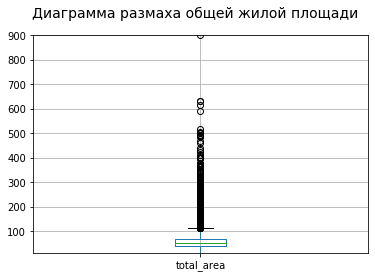

In [268]:
plt.ylim(12, 900)
df_fork.boxplot(column='total_area')
plt.suptitle('Диаграмма размаха общей жилой площади', size=14);

По диаграмме отчетливо видно, что выбросы находятся за пределами значений выше 120 м2, 900 м2 является явно экстремальным выбросом. Поэтому для построения гистограммы ограничимся максимальным значением в 120 м2 и разобьем на 20 бинов. В целом видно нормальное распределение: в ходу квартиры со средними параметрами.

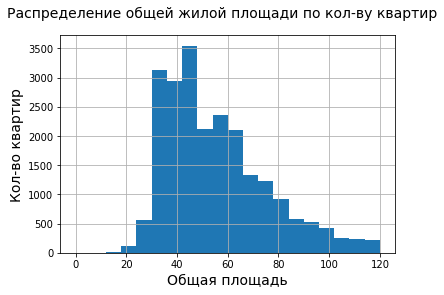

In [269]:
df_fork['total_area'].hist(bins=20, range=(0,120))
plt.xlabel('Общая площадь', size=14)
plt.ylabel('Кол-во квартир', size=14)
plt.suptitle('Распределение общей жилой площади по кол-ву квартир', size=14);

Диаграмма размаха для значений цены. Исключим ранее самую дорогую позицию, соответствующую площади в 900 м2. Мы видим, что выбросы начинаются от значений менее 100 млн. Ограничим диаграмму максимумом в 100 млн.

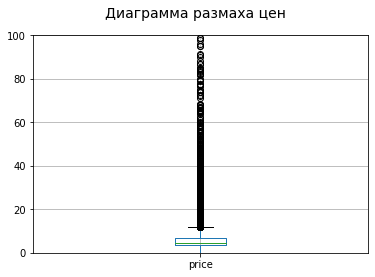

In [270]:
plt.ylim(0, 100)
df_fork.boxplot(column='price')
plt.suptitle('Диаграмма размаха цен', size=14);

Как видим, основное количество квартир лежит в диапазоне до 10 млн, выше идут явные выбросы. Для построения гистограммы можно ограничиться значением в 20 млн. На построенной гистограмме в целом видно нормальное распределение, в ходу квартиры среднего ценового диапазона.

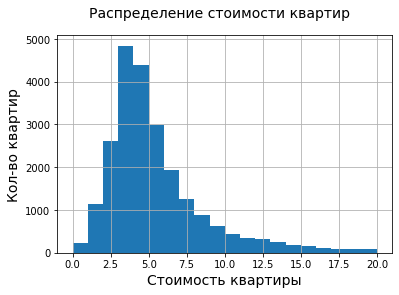

In [271]:
df_fork['price'].hist(bins=20, range=(0,20))
plt.xlabel('Стоимость квартиры', size=14)
plt.ylabel('Кол-во квартир', size=14)
plt.suptitle('Распределение стоимости квартир', size=14);

Диаграмма размаха для количества комнат показывает выбросы за пределами значения в 6 комнат, остальное - выбросы.

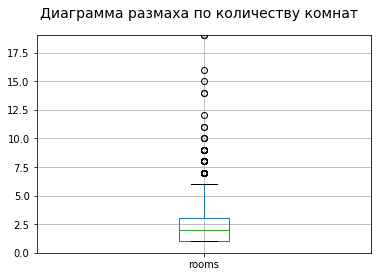

In [272]:
plt.ylim(0, 19)
df_fork.boxplot(column='rooms')
plt.suptitle('Диаграмма размаха по количеству комнат', size=14);

Для построения гистограммы ограничимся количеством в 8 комнат. Явно преобладает количество квартир с небольшим количеством комнат.

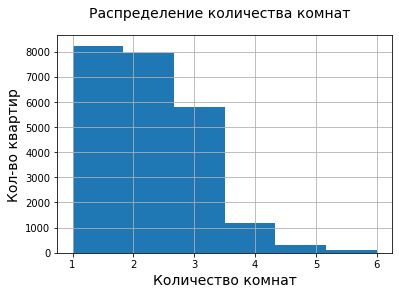

In [273]:
df_fork['rooms'].hist(bins=6, range=(1,6))
plt.xlabel('Количество комнат', size=14)
plt.ylabel('Кол-во квартир', size=14)
plt.suptitle('Распределение количества комнат', size=14);

Диаграмма размаха показывает выбросы за пределами значения 2,5-3 м

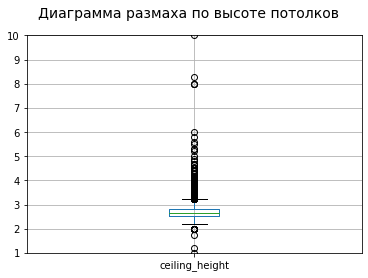

In [274]:
plt.ylim(1, 10)
df_fork.boxplot(column='ceiling_height')
plt.suptitle('Диаграмма размаха по высоте потолков', size=14);

Для построения гистограммы по высоте потолков ограничимся высотой в 4 м, остальные значения являются выбросами. Никаких сюрпризов данные не представили. Массовая высота потолков - до 2,7 м.

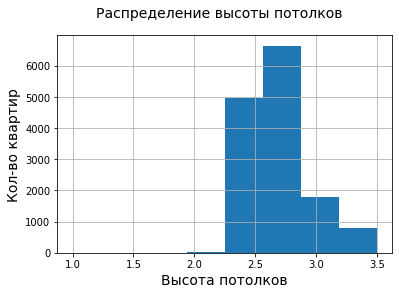

In [275]:
df_fork['ceiling_height'].hist(bins=8, range=(1,3.5))
plt.xlabel('Высота потолков', size=14)
plt.ylabel('Кол-во квартир', size=14)
plt.suptitle('Распределение высоты потолков', size=14);

**Изучим продажи квартир**

Составим запрос на выявление времени продажи квартир и построим гистограмму. Удалим нулевые значения, максимальное значение - 1580 дней.

In [276]:
df_sale_time = df_fork.query('days_exposition>0')
df_sale_time.describe()

,total_images,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exp,month_exp,year_exp,living_to_total,kitchen_to_total,price
count,20470.000000,20470.000000,20470.000000,12037.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,15801.000000,...,20470.000000,7431.000000,20470.000000,2.047000e+04,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000
mean,9.614753,58.845355,2.033708,2.722163,10.822960,33.550156,5.988227,10.403747,0.592330,28.853262,...,0.587787,0.547033,180.753200,9.803190e+04,2.585198,6.587543,2017.217978,0.564468,0.193925,6.264805
std,5.659263,34.080771,1.048642,0.304299,6.670151,21.065433,4.941784,3.363268,0.949376,12.712536,...,0.878849,0.261427,219.777916,4.776190e+04,1.783331,3.486079,0.965611,0.113332,0.045101,10.873552
min,0.000000,12.000000,1.000000,1.000000,0.000000,2.000000,1.000000,7.870000,0.000000,6.450000,...,0.000000,0.100000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.020000,0.070000,0.012190
25%,6.000000,39.500000,1.000000,2.520000,5.000000,18.000000,2.000000,9.570000,0.000000,18.500000,...,0.000000,0.340000,45.000000,7.647059e+04,1.000000,3.000000,2017.000000,0.490000,0.160000,3.400000
50%,9.000000,50.800000,2.000000,2.650000,9.000000,30.000000,4.000000,9.570000,0.000000,26.790000,...,0.000000,0.530000,95.000000,9.407651e+04,3.000000,7.000000,2017.000000,0.560000,0.190000,4.500000
75%,14.000000,67.800000,3.000000,2.800000,16.000000,42.000000,8.000000,9.570000,1.000000,37.410000,...,1.000000,0.750000,231.000000,1.121752e+05,4.000000,10.000000,2018.000000,0.640000,0.230000,6.500000
max,50.000000,900.000000,19.000000,10.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84.870000,...,3.000000,1.340000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.670000,0.660000,763.000000


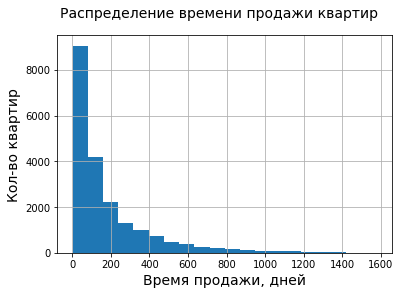

In [277]:
df_sale_time['days_exposition'].hist(bins=20, range=(1,1580))
plt.xlabel('Время продажи, дней', size=14)
plt.ylabel('Кол-во квартир', size=14)
plt.suptitle('Распределение времени продажи квартир', size=14);

Найдем среднее значение и медиану:

In [278]:
print("Средний срок продажи квартир:",df_sale_time['days_exposition'].mean())
print("Медианный срок продажи квартир:",df_sale_time['days_exposition'].median())

Средний срок продажи квартир: 180.7531998045921
Медианный срок продажи квартир: 95.0


Из гистограммы видно, что подавляющее количество квартир было продано примерно в двухмесячный период, далее с уменьшением количества случаев срок продажи растягивается на столько же.

Построим диаграмму размаха:

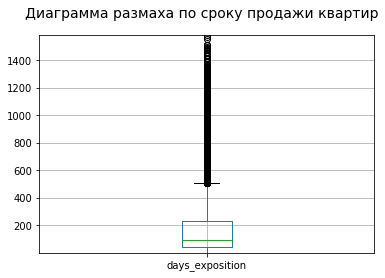

In [279]:
plt.ylim(1, 1580)
df_sale_time.boxplot(column='days_exposition')
plt.suptitle('Диаграмма размаха по сроку продажи квартир', size=14);

С уточнением (выбросы в большую сторону начинаются примерно от 500 дней):

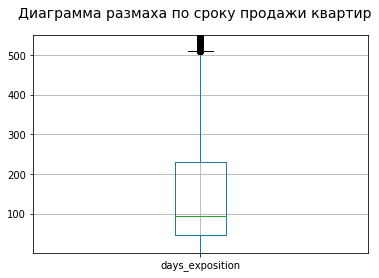

In [280]:
plt.ylim(1, 550)
df_sale_time.boxplot(column='days_exposition')
plt.suptitle('Диаграмма размаха по сроку продажи квартир', size=14);

`Можно считать, что нормальный срок продажи квартир находится в промежутке от 40 до 240 дней` (межквартильное расстояние). Все, что меньше - это необычно быстрый срок продажи, все, что дольше - необычно долгий срок продажи.

**Проверим редкие и выбивающиеся значения**

Редкие и выбивающиеся значения были указаны при построении гистограмм. Напомним:
- По значению общей площади - менее 30 м2 и более 120 м2;
- По значению стоимости - ниже 2 млн и выше 10 млн;
- По количеству комнат - более 6 комнат;
- По высоте потолков - ниже 2,25 м и выше 3,5 м
- По количеству дней продажи - более 500 дней;
- Как мы помним, отсутствующие значения cityCenters_nearest мы заменяли на 0, поэтому для чистоты эксперимента исключим нулевые значения.

Удалим эти значения из нашей таблицы, сохраним таблицу в датафрейм df_fork_final

In [281]:
df_fork_final = df_fork.query(
    '(30<=total_area<=120)&(2<=price<=10)').reset_index()
df_fork_final.head()

,index,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,category,type_settlement,price_per_sqm,weekday_exp,month_exp,year_exp,type_floor,living_to_total,kitchen_to_total,price
0,1,7,40.4,2018-12-04,1,NaN,11,18.6,1,9.57,...,regular,поселок,82920.79,1,12,2018,первый,0.46,0.24,3.350
1,2,10,56.0,2015-08-20,2,NaN,5,34.3,4,9.57,...,regular,город,92785.71,3,8,2015,другой,0.61,0.17,5.196
2,4,2,100.0,2018-06-19,2,3.03,14,32.0,13,15.75,...,regular,город,100000.00,1,6,2018,другой,0.32,0.16,10.000
3,5,10,30.4,2018-09-10,1,NaN,12,14.4,5,7.87,...,regular,поселок,95065.79,0,9,2018,другой,0.47,0.26,2.890
4,6,6,37.3,2017-11-02,1,NaN,26,10.6,6,7.87,...,regular,поселок,99195.71,3,11,2017,другой,0.28,0.21,3.700


Проверим пороговые значения, все данные выглядят корректными:

In [282]:
print('Минимальная общая площадь квартиры:',df_fork_final['total_area'].min())
print('Максимальная общая площадь квартиры:',df_fork_final['total_area'].max())
print('Минимальная стоимость квартиры:',df_fork_final['price'].min())
print('Максимальная стоимость квартиры:',df_fork_final['price'].max())
print('Максимальное количество комнат:',df_fork_final['rooms'].max())
print('Минимальная высота потолков:',df_fork_final['ceiling_height'].min())
print('Максимальная высота потолков:',df_fork_final['ceiling_height'].max())
print('Минимальный срок продажи квартиры:',df_fork_final['days_exposition'].min())
print('Максимальный срок продажи квартиры:',df_fork_final['days_exposition'].max())

Минимальная общая площадь квартиры: 30.0
Максимальная общая площадь квартиры: 120.0
Минимальная стоимость квартиры: 2.0
Максимальная стоимость квартиры: 10.0
Максимальное количество комнат: 6
Минимальная высота потолков: 1.0
Максимальная высота потолков: 10.3
Минимальный срок продажи квартиры: 0
Максимальный срок продажи квартиры: 1580


**Какие факторы больше всего влияют на стоимость квартиры?**
- Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. 
- Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
- Изучим зависимость от даты размещения: дня недели, месяца и года.

Сначала изучим зависимости через сводные таблицы. Создадим словари по указанным категориям. 

Цена / площадь. Сгруппируем площади по категориям при помощи функции:

In [283]:
def by_area(area):
    if area <= 40:
        return 40
    if area <= 60:
        return 60
    if area <= 80:
        return 80
    if area <= 100:
        return 100
    else:
        return 120
    
dict_area_price = df_fork_final[['total_area', 'price_per_sqm']]
dict_area_price['total_area'] = dict_area_price['total_area'].apply(by_area)
grouped_area_price = dict_area_price.pivot_table(index='total_area', values='price_per_sqm', aggfunc=['mean'])
grouped_area_price['%'] = grouped_area_price['mean']/df_fork_final['price_per_sqm'].mean()
print(grouped_area_price)

                     mean         %
            price_per_sqm          
total_area                         
40          102540.420565  1.090087
60           93640.962258  0.995479
80           88921.067039  0.945303
100          84722.069765  0.900664
120          75937.481211  0.807277


**Вывод: с увеличением параметра зависимость падает**

Цена / количество комнат:

In [284]:
dict_rooms_price = df_fork_final[['rooms', 'price_per_sqm']]
grouped_rooms_price = dict_rooms_price.pivot_table(index='rooms', values='price_per_sqm', aggfunc=['mean'])
grouped_rooms_price['%'] = grouped_rooms_price['mean']/df_fork_final['price_per_sqm'].mean()
print(grouped_rooms_price)

                mean         %
       price_per_sqm          
rooms                         
1      103643.880385  1.101818
2       93213.633063  0.990936
3       82983.583889  0.882182
4       78244.148799  0.831798
5       72852.995574  0.774486
6       76899.887500  0.817508


**Вывод: с увеличением параметра зависимость падает**

Цена / удаленность от центра. Для начала проверим максимальные / минимальные значения.

In [285]:
print(df_fork_final['cityCenters_nearest'].min())
print(df_fork_final['cityCenters_nearest'].max())

0.21
65.97


Создадим функцию для сортировки по расстоянию:

In [286]:
def by_nearest(dist):
    if dist <= 1:
        return 1
    if dist <= 5:
        return 5
    if dist <= 10:
        return 10
    if dist <= 30:
        return 30
    if dist <= 50:
        return 50
    else:
        return 60
    
dict_dist_price = df_fork_final[['cityCenters_nearest', 'price_per_sqm']]
dict_dist_price['cityCenters_nearest'] = dict_dist_price['cityCenters_nearest'].apply(by_nearest)
grouped_dist_price = dict_dist_price.pivot_table(index='cityCenters_nearest', values='price_per_sqm', aggfunc=['mean'])
grouped_dist_price['%'] = grouped_dist_price['mean']/df_fork_final['price_per_sqm'].mean()
print(grouped_dist_price)

                              mean         %
                     price_per_sqm          
cityCenters_nearest                         
1                    115215.394412  1.224832
5                    112889.998148  1.200112
10                   112058.976230  1.191277
30                    99585.148025  1.058670
50                    83054.055653  0.882931
60                    68971.277510  0.733220


**Вывод: с увеличением параметра зависимость падает**

Цена / этаж:

In [287]:
dict_floor_price = df_fork_final[['type_floor', 'price_per_sqm']]
grouped_floor_price = dict_floor_price.pivot_table(index='type_floor', values='price_per_sqm', aggfunc=['mean'])
grouped_floor_price['%'] = grouped_floor_price['mean']/df_fork_final['price_per_sqm'].mean()
print(grouped_floor_price)

                    mean         %
           price_per_sqm          
type_floor                        
другой      96776.149725  1.028808
первый      83600.065931  0.888736
последний   88332.327546  0.939044


**Вывод: как обычно, первый этаж пользуется меньшим спросом**

Построим диаграммы рассеяния:

Цена / площадь

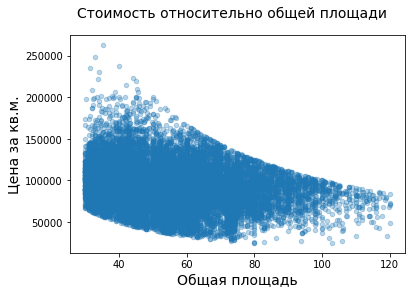

In [288]:
df_fork_final.plot(x='total_area', y='price_per_sqm', kind='scatter', alpha=0.3)
plt.xlabel('Общая площадь', size=14)
plt.ylabel('Цена за кв.м.', size=14)
plt.suptitle('Стоимость относительно общей площади', size=14);

Цена / число комнат:

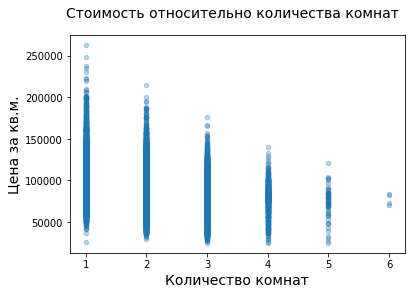

In [289]:
df_fork_final.plot(x='rooms', y='price_per_sqm', kind='scatter', alpha=0.3)
plt.xlabel('Количество комнат', size=14)
plt.ylabel('Цена за кв.м.', size=14)
plt.suptitle('Стоимость относительно количества комнат', size=14);

Цена / удаленность от центра:

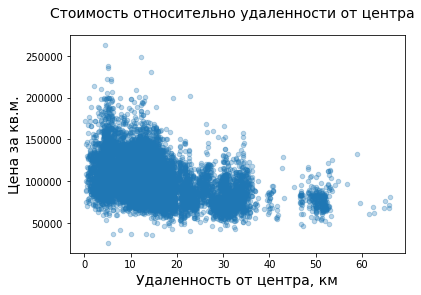

In [290]:
df_fork_final.plot(x='cityCenters_nearest', y='price_per_sqm', kind='scatter', alpha=0.3)
plt.xlabel('Удаленность от центра, км', size=14)
plt.ylabel('Цена за кв.м.', size=14)
plt.suptitle('Стоимость относительно удаленности от центра', size=14);

Цена / этаж (необходимо создать промежуточную таблицу, чтобы перевести текстовые значения в численные):

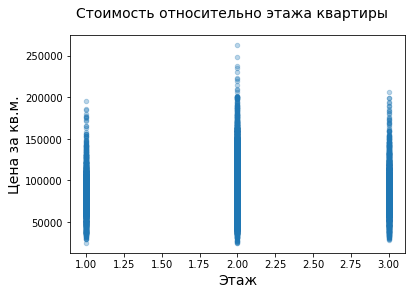

In [291]:
def sort_floor(floor):
    if floor == "первый":
        return 1
    if floor == "другой":
        return 2
    if floor == "последний":
        return 3

df_fork_type_floor = df_fork_final
df_fork_type_floor['num_floor'] = df_fork_type_floor['type_floor'].apply(sort_floor).astype(int)
df_fork_final.plot(x='num_floor', y='price_per_sqm', kind='scatter', alpha=0.3)
plt.xlabel('Этаж', size=14)
plt.ylabel('Цена за кв.м.', size=14)
plt.suptitle('Стоимость относительно этажа квартиры', size=14);

**Найдем также коэффициенты корреляции Пирсона для всех пар:**

In [292]:
(df_fork_final[['price_per_sqm','total_area','rooms','cityCenters_nearest','type_floor','weekday_exp','month_exp','year_exp']]
.corr()['price_per_sqm']
.to_frame()
.sort_values('price_per_sqm', ascending=False)
.style
.background_gradient(cmap="Greens"))

,price_per_sqm
price_per_sqm,1
year_exp,0.103487
weekday_exp,0.000479555
month_exp,-0.00957699
total_area,-0.227067
rooms,-0.332662
cityCenters_nearest,-0.388854


**Выводы:**

Как мы видим из коэффициентов Пирсона и диаграмм рассеяния:
- Видна обратная связь для первых трех пар: 'total_area', 'rooms', 'cityCenters_nearest' - т.е. с увеличением параметра стоимость уменьшается, тем не менее, связь не слишком сильная.
- Для пары тип этажа / стоимость связь незаметна.
- Для пар 'weekday_exp','month_exp','year_exp' полученные коэффициенты не позволяют судить о прочном наличии связей, `кроме последнего случая - с каждым годом цена немного растет.`

**Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах:**

In [293]:
top_ten_cities = df_fork_final.groupby('locality_name').count().sort_values(by='index', ascending=False)[:10]
top_ten_cities = top_ten_cities.groupby('locality_name')['index'].mean().sort_values(ascending=False)
avg_price_per_sqm = df_fork_final.groupby('locality_name')['price_per_sqm'].mean().round(decimals=2)
avg_price_stat = top_ten_cities.to_frame().merge(avg_price_per_sqm, on='locality_name', how='left')
avg_price_stat.columns = ['number_ads', 'price_per_sqm'] 
print(avg_price_stat)

                 number_ads  price_per_sqm
locality_name                             
Санкт-Петербург       12687      103971.97
Мурино                  507       84867.24
Кудрово                 424       94291.10
Шушары                  420       77721.99
Всеволожск              368       67454.80
Колпино                 329       75062.20
Пушкин                  324       99934.79
Парголово               318       90446.60
Гатчина                 283       70051.89
Выборг                  193       59628.39


Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья:

In [294]:
print("Минимальная средняя стоимость кв.м жилья:",avg_price_stat['price_per_sqm'].min())
print("Максимальная средняя стоимость кв.м жилья:",avg_price_stat['price_per_sqm'].max())

Минимальная средняя стоимость кв.м жилья: 59628.39
Максимальная средняя стоимость кв.м жилья: 103971.97


**Для каждой квартиры указана информация о расстоянии до центра.** 
- Выясним, какая область входит в центр Санкт-Петербурга. Укажем расстояние до центра в километрах: округлите до целых значений. 
- После этого посчитаем среднюю цену для каждого километра. 
- Построим график: он должен показывать, как цена зависит от удалённости от центра. 
- Определим границу, где график сильно меняется — это и будет центральная зона.

In [295]:
df_fork_final = df_fork
df_fork_SPB = df_fork_final[df_fork_final['locality_name']=='Санкт-Петербург']
df_fork_SPB['cityCenters_nearest'] = df_fork_SPB['cityCenters_nearest'].round(decimals=0)
df_fork_SPB.head()

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,category,type_settlement,price_per_sqm,weekday_exp,month_exp,year_exp,type_floor,living_to_total,kitchen_to_total,price
0,20,108.0,2019-03-07,3,2.70,16,51.00,8,15.75,0,...,regular,город,120370.37,3,3,2019,другой,0.47,0.15,13.000
2,10,56.0,2015-08-20,2,NaN,5,34.30,4,9.57,0,...,regular,город,92785.71,3,8,2015,другой,0.61,0.17,5.196
3,0,159.0,2015-07-24,3,NaN,14,47.39,9,15.75,0,...,regular,город,408176.10,4,7,2015,другой,0.30,0.10,64.900
4,2,100.0,2018-06-19,2,3.03,14,32.00,13,15.75,0,...,regular,город,100000.00,1,6,2018,другой,0.32,0.16,10.000
7,5,71.6,2019-04-18,2,NaN,24,31.74,22,9.57,2,...,regular,город,110544.69,3,4,2019,другой,0.44,0.13,7.915


Построим график:

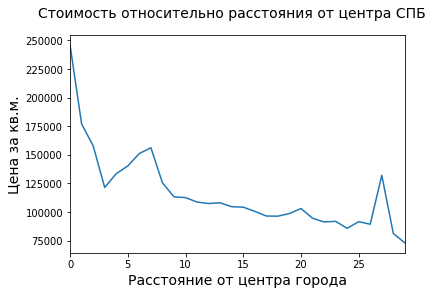

In [296]:
df_fork_SPB_temp = df_fork_SPB.groupby('cityCenters_nearest')['price_per_sqm'].mean()
df_fork_SPB_temp.plot()
plt.xlabel('Расстояние от центра города', size=14)
plt.ylabel('Цена за кв.м.', size=14)
plt.suptitle('Стоимость относительно расстояния от центра СПБ', size=14);

**Выводы:**
- Из графика мы видим, что цены начинают значительно падать на отметке примерно 2,5 - 3 км от центра, следовательно, это и будет граница центральной зоны

**Проанализируем сегмент квартир в центре:**
- изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
- выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
- Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

In [297]:
df_fork_SPB_center = df_fork_SPB[df_fork_SPB['cityCenters_nearest']<=3]
df_fork_SPB_center = df_fork_SPB_center[[
    'total_area', 'price_per_sqm', 'rooms', 'ceiling_height']]
df_fork_SPB_center.head()

,total_area,price_per_sqm,rooms,ceiling_height
24,97.2,66872.43,2,NaN
99,90.0,106666.67,4,NaN
138,40.0,120000.00,2,NaN
154,80.0,102500.00,3,4.15
155,317.0,302839.12,4,3.50


`Построим матрицу рассеяния и проверим статистику методом describe и коэффициентами корреляции:`

In [298]:
df_fork_SPB_center.describe()

,total_area,price_per_sqm,rooms,ceiling_height
count,878.000000,8.780000e+02,878.000000,610.000000
mean,98.666196,1.502749e+05,3.115034,3.214197
std,56.566506,1.251821e+05,1.479384,0.380434
min,12.000000,2.891963e+04,1.000000,2.500000
25%,63.300000,9.649611e+04,2.000000,3.000000
50%,85.000000,1.174205e+05,3.000000,3.200000
75%,116.500000,1.517912e+05,4.000000,3.447500
max,517.000000,1.736842e+06,14.000000,5.800000


In [299]:
df_fork_SPB_center.corr().head()

,total_area,price_per_sqm,rooms,ceiling_height
total_area,1.000000,0.210051,0.742822,0.168316
price_per_sqm,0.210051,1.000000,-0.045535,0.142111
rooms,0.742822,-0.045535,1.000000,0.050868
ceiling_height,0.168316,0.142111,0.050868,1.000000


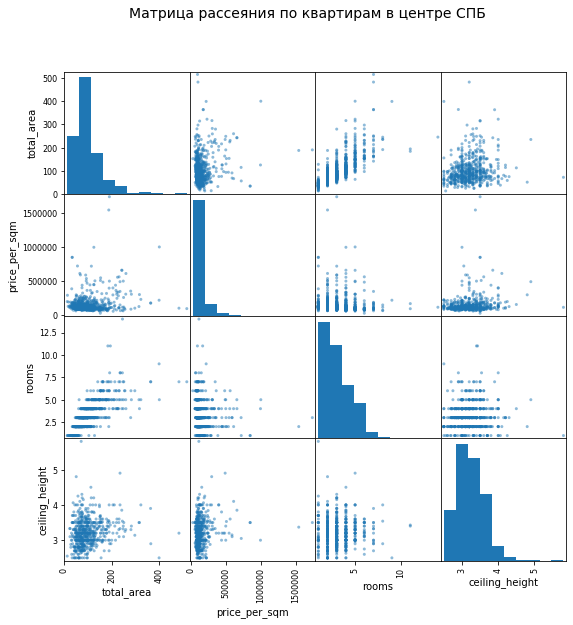

In [300]:
pd.plotting.scatter_matrix(df_fork_SPB_center, figsize=(9, 9))
plt.suptitle('Матрица рассеяния по квартирам в центре СПБ', size=14);

**Какие выводы можно сделать, исходя из этих данных:**
- Максимальное количество комнат на продажу в центре - 6, основную массу составляют квартиры размером от 2 до 3 комнат;
- Квартиры на продажу по большей части принадлежат к высокому ценовому сегменту;
- Высота потолков не нарушает норму, находится в пределах 2,5-3 м;
- Стоимость квадратного метра падает пропорционально общей площади: чем больше квартира, тем дешевле обходится квадратный метр.

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Для этого создадим второй вариант таблицы и распечатаем коэффициенты корреляции:

In [301]:
df_fork_SPB_center = df_fork_SPB[df_fork_SPB['cityCenters_nearest']<=3]

`Строим график зависимости стоимости от числа комнат (для этого и следующих графиков будем использовать медианную стоимость):`

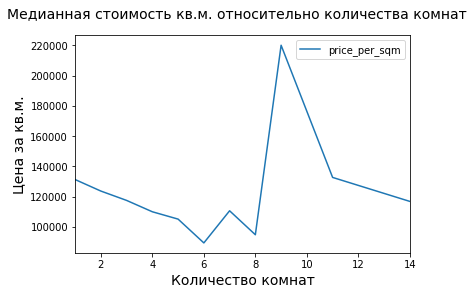

In [302]:
room_SPB_center = df_fork_SPB_center.pivot_table(
    index = 'rooms', values = 'price_per_sqm', aggfunc = ['median'])

room_SPB_center.plot(y = 'median')
plt.xlabel('Количество комнат', size=14)
plt.ylabel('Цена за кв.м.', size=14)
plt.suptitle('Медианная стоимость кв.м. относительно количества комнат', size=14);

- **График подтверждает выше сделанный вывод о том, что квадратный метр обходится дешевле по мере увеличения площади квартиры, количество комнат совпадает с этим.**
- **Вместе с тем, имеется пик на количестве 8-10 комнат, где происходит резкое увеличение стоимости.**

`Строим график зависимости стоимости от этажа:`

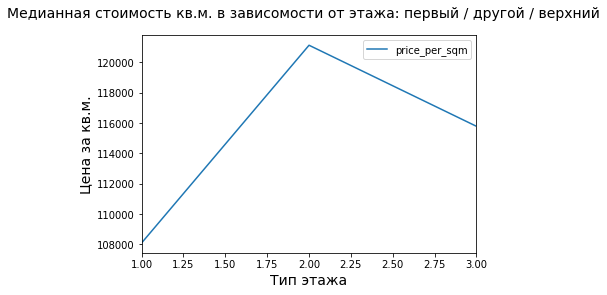

In [303]:
df_fork_SPB_center = df_fork_SPB[df_fork_SPB['cityCenters_nearest']<=3]
def sort_floor(floor):
    if floor == "первый":
        return 1
    if floor == "другой":
        return 2
    if floor == "последний":
        return 3

df_fork_SPB_center['num_floor'] = df_fork_SPB_center['type_floor'].apply(sort_floor).astype(int)

df_fork_SPB_center = df_fork_SPB_center[[
    'price_per_sqm', 'rooms', 'num_floor', 'cityCenters_nearest', 'year_exp']]

floor_SPB_center = df_fork_SPB_center.pivot_table(
    index = 'num_floor', values = 'price_per_sqm', aggfunc = ['median'])

floor_SPB_center.plot(y = 'median')
plt.xlabel('Тип этажа', size=14)
plt.ylabel('Цена за кв.м.', size=14)
plt.suptitle('Медианная стоимость кв.м. в зависомости от этажа: первый / другой / верхний', size=14);

**График подтверждает популярность не первых и не последних этажей, и первый хуже по восприятию, чем последний**

`График удаленности от центра:`

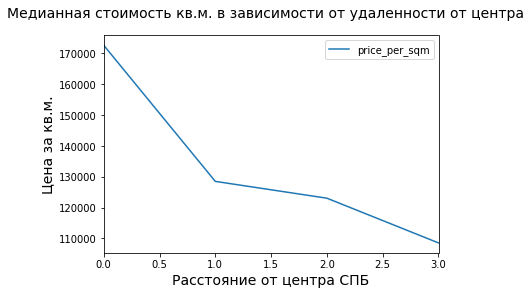

In [304]:
km_SPB_center = df_fork_SPB_center.pivot_table(
    index = 'cityCenters_nearest', values = 'price_per_sqm', aggfunc = ['median'])

km_SPB_center.plot(y = 'median')
plt.xlabel('Расстояние от центра СПБ', size=14)
plt.ylabel('Цена за кв.м.', size=14)
plt.suptitle('Медианная стоимость кв.м. в зависимости от удаленности от центра', size=14);

**График удаленности от центра указывает на падение стоимости с каждым километром**

`Построим график стоимости кв.м в зависимости от даты размещения объявления:`

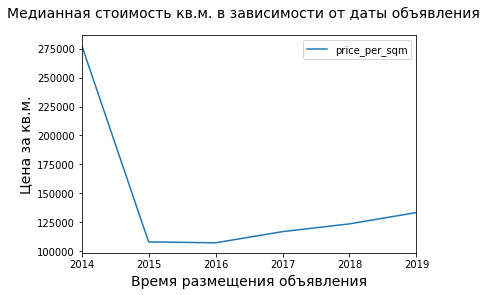

In [305]:
year_SPB_center = df_fork_SPB_center.pivot_table(
    index = 'year_exp', values = 'price_per_sqm', aggfunc = ['median'])

year_SPB_center.plot(y = 'median')
plt.xlabel('Время размещения объявления', size=14)
plt.ylabel('Цена за кв.м.', size=14)
plt.suptitle('Медианная стоимость кв.м. в зависимости от даты объявления', size=14);

**Из графика видно резкое падение стоимости в 2014-2015 годах (связано с кризисом?), определенный период застоя цен в 2015-2016 гг и далее медленный рост цен**

**Выводы:**
    
По статистике:
- средний срок продажи квартир: 180 дней;
- медианный срок продажи квартир: 95 дней;
- с увеличением параметров зависимость "Цена / площадь", "Цена / количество комнат", "Цена / удаленность от центра" уменьшается;
- первый и последний этажи не так популярны, как остальные;
- данные согласуются с общей информацией по всему городу, но в центре преобладают квартиры более дорогого сегмента.

## Общий вывод

Нами проведен анализ базы данных продаж квартир в Санкт-Петербурге и области. Во время обработки были удалены экстремальные и непоказательные значения, заполнены пропуски в данных, данные приведены к удобочитаемому формату.

Мы выявили средние значения и средний слой, по которым выполнили выборку и сделали выводы, детально описанные в предыдущем этапе. Центральный район был ограничен зоной радиусом 3 км.

Можно утверждать, что: 
- средний срок продажи квартир не превышает 500 дней;
- несмотря на то, что общая стоимость квартир с увеличением площади и количества комнат растет, квартиры большой площади в выражении стоимости за квадратный метр обходятся дешевле, чем квартиры малой площади;
- подавляющее количество проданных квартир имеют от 2 до 3 комнат, и стоят в районе 6-10 млн, и, что ожидаемо, в центре города квартиры стоят дороже;
- со временем стоимость квартир растет, также был отмечен любопытный годовой период стабилизации стоимости квадратного метра жилья в 2015 - 2016 гг.